In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout 
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
fashion = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


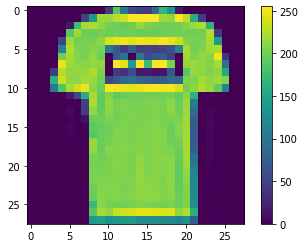

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

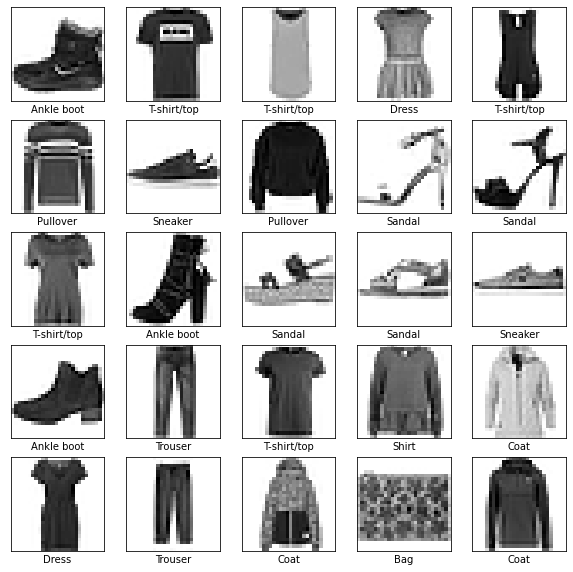

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4987 - accuracy: 0.8233
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3723 - accuracy: 0.8662
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.3363 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3101 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2907 - accuracy: 0.8931
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2767 - accuracy: 0.8976
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2666 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2557 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2481 - accuracy: 0.9067
Epoch 10/10
60000/60000 [==============================

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)


10000/10000 [==============================] - 0s 27us/step

Test accuracy: 0.8756999969482422


In [19]:
predictions = model.predict(test_images)

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

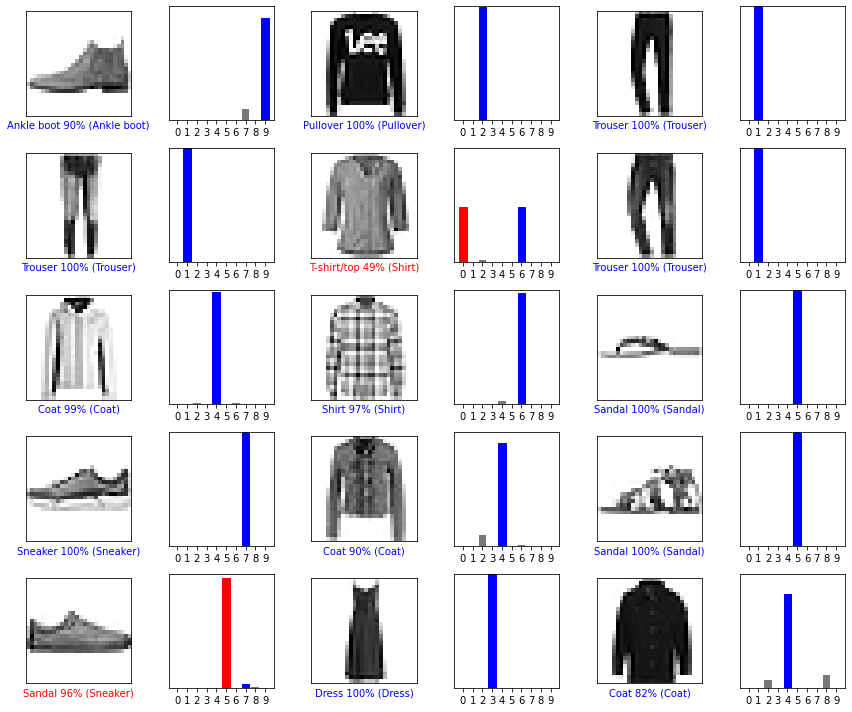

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
